In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [118]:
import seaborn as sns
from datetime import datetime
from sklearn.feature_selection import RFE

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [122]:
bank_data= pd.read_csv('creditcard.csv')

In [123]:
bank_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [124]:
bank_data.shape

(284807, 31)

In [125]:
bank_data_true=bank_data[bank_data['Class']==0]
bank_data_fraud=bank_data[bank_data['Class']==1]

In [126]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [127]:
bank_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [128]:
bank_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

From the distribution we can see that the data is highly inbalances so so to get a better result we have to balance the dataset , we are under sampling the normal data to match the value of fraud data. Upsampling might be used to get more accuracy but it will algo add dummy data, which might be risky for something as sensity as fraud detection .

In [129]:
bank_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [130]:
bank_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


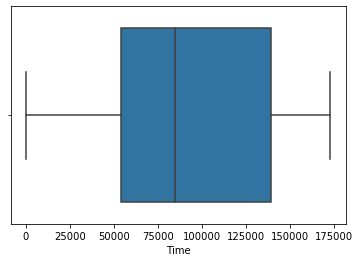

In [131]:
sns.boxplot(bank_data['Time'])

The time column is the time difference in seconds from the first transaction , we can see if there is any seasonality in the data , if we convert the seconds into date time format

In [132]:
def convert_time(time):
    return datetime.fromtimestamp(time).strftime("%A, %B %d, %Y %I:%M:%S")

In [133]:
bank_data['date_tie']=bank_data['Time'].apply(lambda x : convert_time(x))

In [134]:
bank_data['date_tie']=pd.to_datetime(bank_data['date_tie'])

In [135]:
bank_data['year']=bank_data['date_tie'].dt.year
bank_data['month']=bank_data['date_tie'].dt.month_name()
bank_data['day']=bank_data['date_tie'].dt.day_name()
bank_data['time']=bank_data['date_tie'].dt.time

In [136]:
timedelta = pd.to_timedelta(bank_data['Time'], unit='s')
bank_data['Time_hour'] = (timedelta.dt.components.hours).astype(int)
bank_data['Time_day'] = (timedelta.dt.components.days).astype(int)

In [137]:
bank_data['Time_day'] = (timedelta.dt.components.days).astype(int)

In [138]:
set(bank_data['Time_day'])

{0, 1}

In [139]:
print("year : ",(set(bank_data['day'])))

year :  {'Friday', 'Saturday', 'Thursday'}


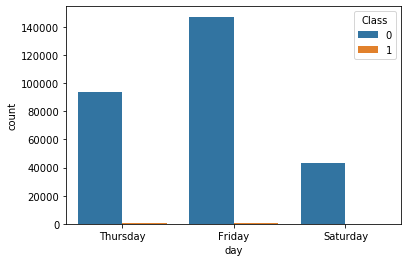

In [140]:
sns.countplot(data=bank_data,x='day',hue='Class')

In [141]:
bank_data_fraud=bank_data[bank_data['Class']==1]
bank_data_normal=bank_data[bank_data['Class']==0]

Under sampling the data by taking 492 randoms amples from normal transaction data 

In [142]:
bank_data_normal=bank_data_normal.sample(n=492,random_state=142)

In [143]:
bank_data_normal.shape

(492, 38)

In [144]:
bank_data_fraud.shape

(492, 38)

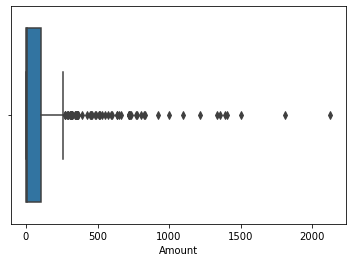

In [145]:
sns.boxplot(bank_data_fraud['Amount'])

In [146]:
bank_data_undersampled = pd.concat([bank_data_fraud, bank_data_normal])

In [147]:
bank_data_undersampled.shape

(984, 38)

dividing date time into  year , month , day and time 

In [148]:
bank_data_undersampled['year']=bank_data_undersampled['date_tie'].dt.year
bank_data_undersampled['month']=bank_data_undersampled['date_tie'].dt.month_name()
bank_data_undersampled['day']=bank_data_undersampled['date_tie'].dt.day_name()
bank_data_undersampled['time']=bank_data_undersampled['date_tie'].dt.time

In [149]:
print("year : ",(set(bank_data_undersampled['year'])))
print("month : ",(set(bank_data_undersampled['month'])))
print("day : ",(set(bank_data_undersampled['day'])))


year :  {1970}
month :  {'January'}
day :  {'Friday', 'Saturday', 'Thursday'}


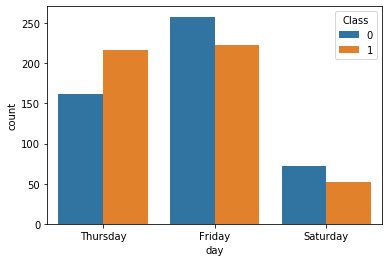

In [150]:
sns.countplot(data=bank_data_undersampled,x='day',hue='Class')

We can see that the fraud data happened consecutive 3 days .probably during a vacation or weekend when there is low amount of staff 

In [151]:
bank_data_undersampled.time

541       06:06:46
623       06:07:52
4920      07:14:22
6108      07:56:26
6329      08:05:19
            ...   
177329    04:12:12
83918     10:41:27
147797    06:43:21
210035    08:16:51
7378      08:45:48
Name: time, Length: 984, dtype: object

In [152]:
bank_data_undersampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,Amount,Class,date_tie,year,month,day,time,Time_hour,Time_day
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,-0.143276,0.00,1,1970-01-01 06:06:46,1970,January,Thursday,06:06:46,0,0
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.035764,529.00,1,1970-01-01 06:07:52,1970,January,Thursday,06:07:52,0,0
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.153029,239.93,1,1970-01-01 07:14:22,1970,January,Thursday,07:14:22,1,0
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.849573,59.00,1,1970-01-01 07:56:26,1970,January,Thursday,07:56:26,1,0
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.146793,1.00,1,1970-01-01 08:05:19,1970,January,Thursday,08:05:19,2,0


In [153]:
bank_data_undersampled['hour']=bank_data_undersampled['date_tie'].dt.hour

Text(0.5, 0.98, 'Downsampled data fraud Pattern by hours')

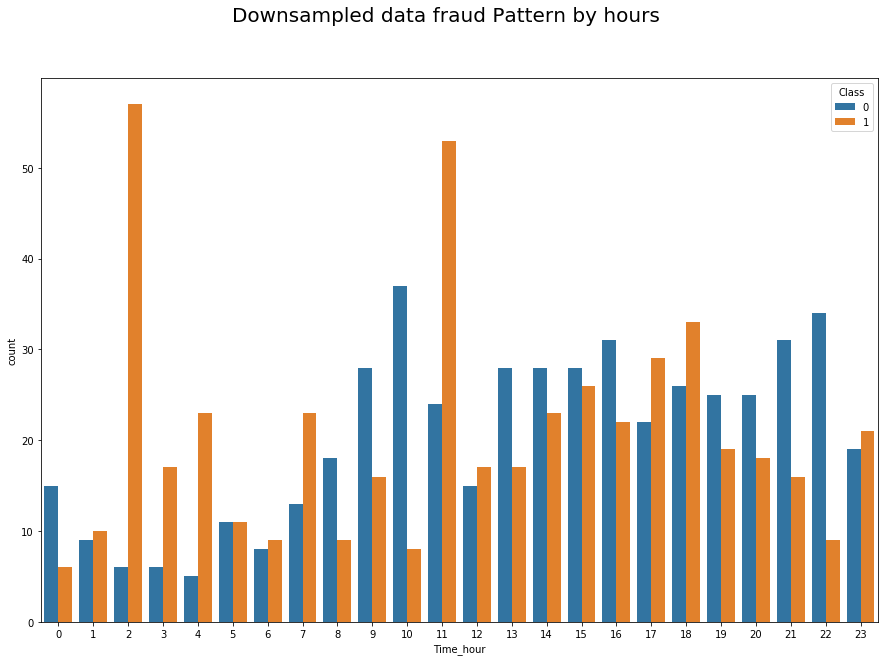

In [154]:
plt.figure(figsize=(15,10))
sns.countplot(data=bank_data_undersampled,x='Time_hour',hue='Class')
plt.suptitle('Downsampled data fraud Pattern by hours',fontsize=20)

In [155]:
bank_data_undersampled['time'].max()

datetime.time(12, 59, 58)

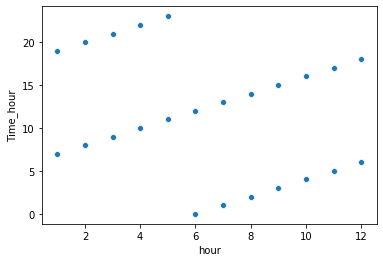

In [156]:
sns.scatterplot(x='hour',y='Time_hour',data=bank_data_undersampled)

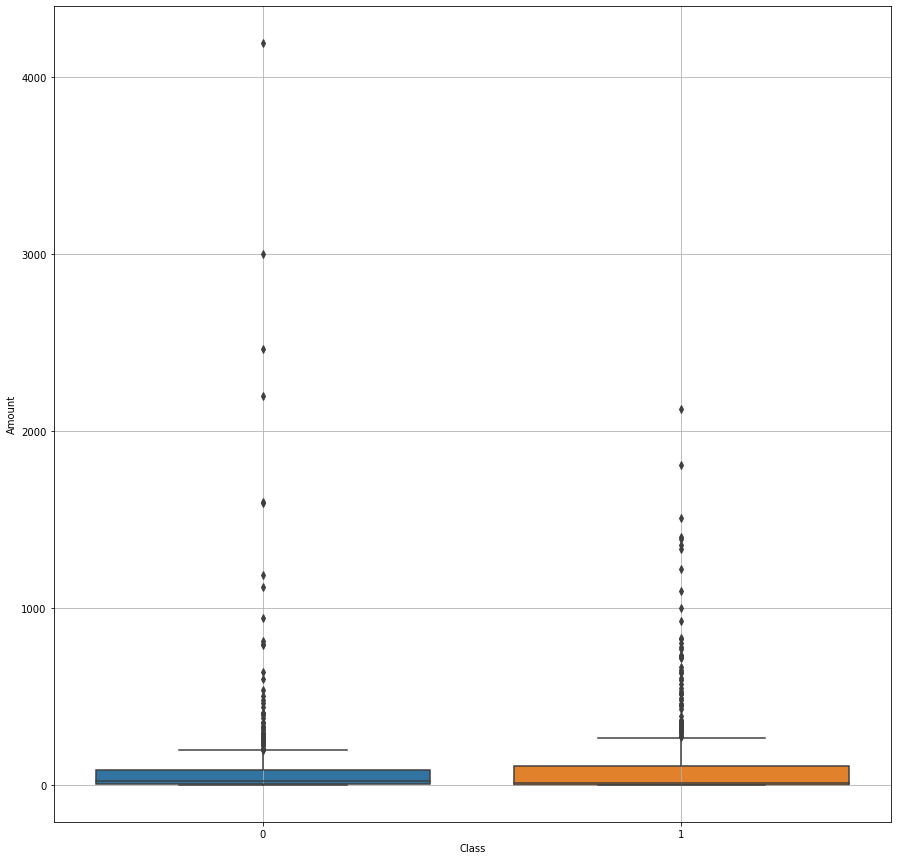

In [157]:
# sns.boxplot(bank_data_undersampled['Amount'])
plt.figure(figsize=(15,15))
sns.boxplot(x=bank_data_undersampled['Class'], y=bank_data_undersampled['Amount'])
plt.grid()

There are lot of outliers in the data, it can also be seen that most fraud transactions are of small amount.

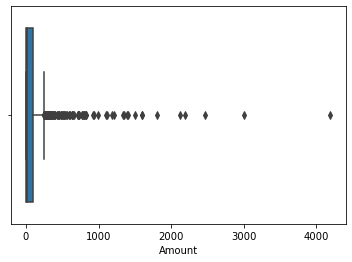

In [158]:
sns.boxplot(bank_data_undersampled['Amount'])

In [159]:
bank_data_undersampled=bank_data_undersampled[bank_data_undersampled['Amount']<1000]

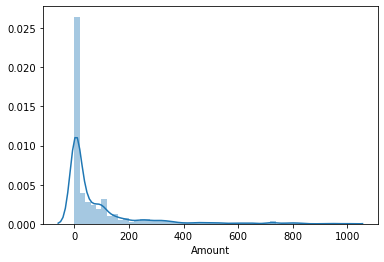

In [160]:
sns.distplot(bank_data_undersampled['Amount'])

In [161]:
bank_data_undersampled=bank_data_undersampled[bank_data_undersampled['Amount'] !=0]
bank_data_undersampled['Amount'] = np.log(bank_data_undersampled.Amount)

In [162]:
set(bank_data_undersampled['Amount'])

{-4.605170185988091,
 -2.3025850929940455,
 -1.6094379124341003,
 -1.2039728043259361,
 -0.9675840262617056,
 -0.3856624808119846,
 -0.37106368139083207,
 -0.2744368457017603,
 -0.2613647641344075,
 -0.18632957819149348,
 -0.11653381625595151,
 -0.10536051565782628,
 -0.08338160893905101,
 -0.030459207484708574,
 -0.01005033585350145,
 0.0,
 0.09531017980432493,
 0.16551443847757333,
 0.20701416938432612,
 0.25464221837358075,
 0.3293037471426003,
 0.37843643572024505,
 0.3987761199573678,
 0.4054651081081644,
 0.412109650826833,
 0.41871033485818504,
 0.4637340162321402,
 0.4762341789963717,
 0.4885800148186709,
 0.5596157879354227,
 0.5766133643039938,
 0.5822156198526637,
 0.6097655716208943,
 0.6418538861723947,
 0.6830968447064438,
 0.6931471805599453,
 0.7514160886839212,
 0.7975071958841882,
 0.8197798314933114,
 0.8241754429663494,
 0.8544153281560676,
 0.8878912573524571,
 0.9042181506398859,
 0.9516578757114463,
 0.9895411936137477,
 1.095273387402595,
 1.0986122886681098,
 1

We can remove Amounts greater than 1000

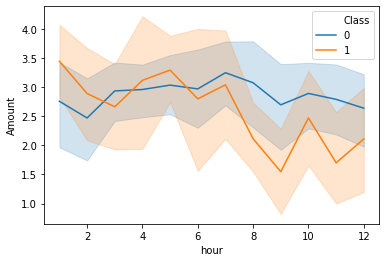

In [163]:
sns.lineplot(data=bank_data_undersampled, x="hour", y="Amount",hue='Class')

We can see there is no corlation between class and amount 

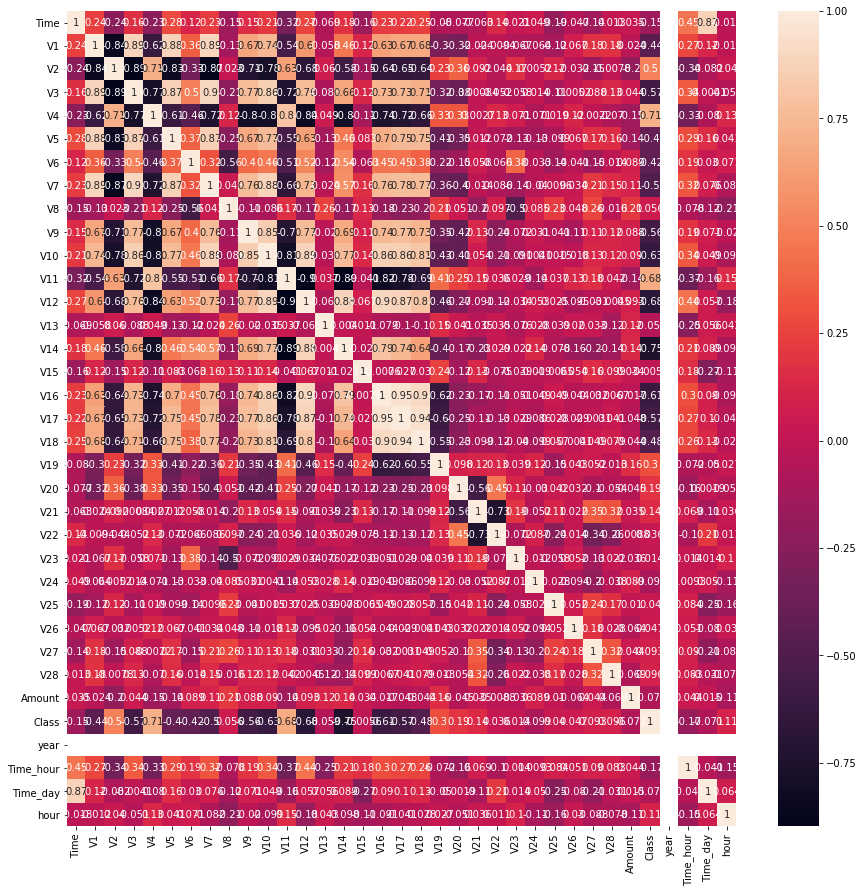

In [164]:
corr = bank_data_undersampled.corr()
plt.figure(figsize=(15,15))
chart=sns.heatmap(corr,annot=True)


Text(0.5, 0.98, 'Negatively colerated data with class')

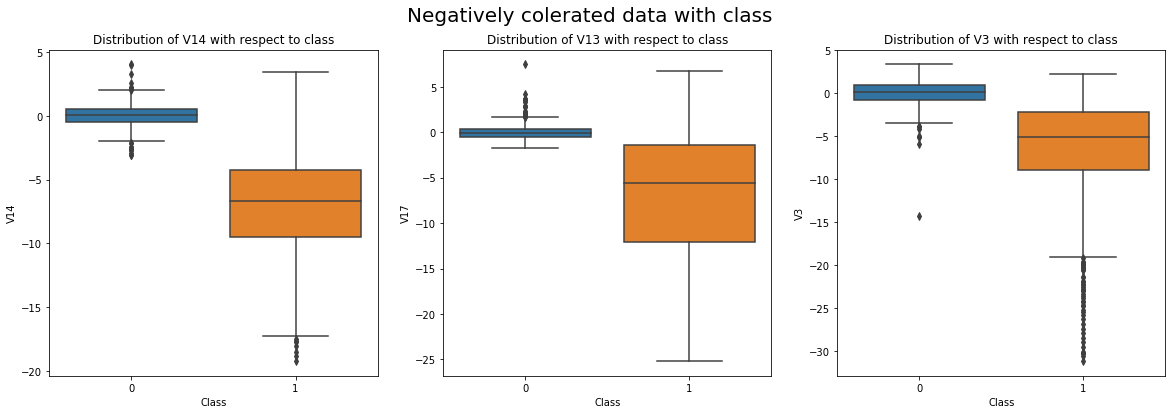

In [165]:
f, axes = plt.subplots(ncols=3, figsize=(20,6))

sns.boxplot(x="Class", y="V14", data=bank_data_undersampled, ax=axes[0])

sns.boxplot(x="Class", y="V17", data=bank_data_undersampled,ax=axes[1])

sns.boxplot(x="Class", y="V3", data=bank_data_undersampled,ax=axes[2])
# plt.title("Distribution of Negative corelated values")
axes[0].set_title("Distribution of V14 with respect to class")
axes[1].set_title("Distribution of V13 with respect to class")
axes[2].set_title("Distribution of V3 with respect to class")
f.suptitle('Negatively colerated data with class',fontsize=20)

Some negatively colerated data , it can be seen that wehn it come toh V14 ,V12 ,V3 values mostly close to 0 will result in Normal transaction whereas values  close to -5 will result in a fraud 

Text(0.5, 0.98, 'Positively colerated data with class')

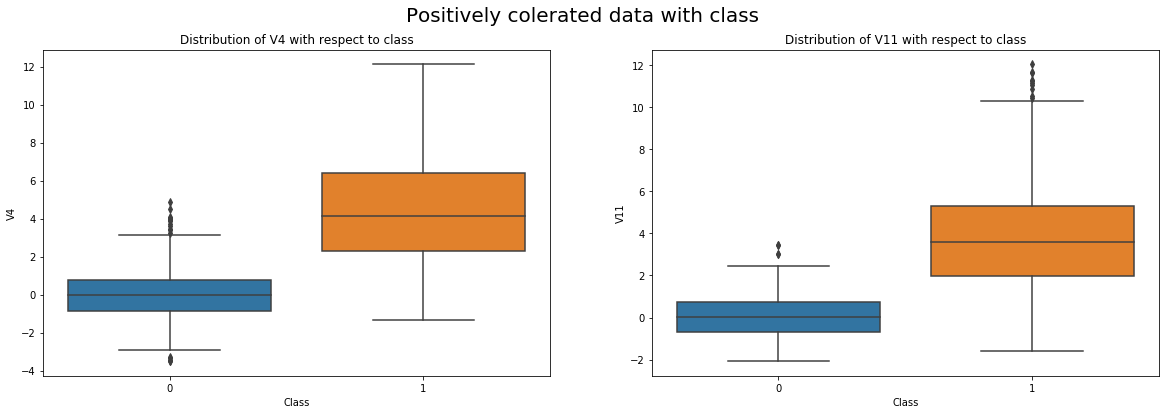

In [166]:
f, axes = plt.subplots(ncols=2, figsize=(20,6))

sns.boxplot(x="Class", y="V4", data=bank_data_undersampled, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=bank_data_undersampled,ax=axes[1])
axes[0].set_title("Distribution of V4 with respect to class")
axes[1].set_title("Distribution of V11 with respect to class")
f.suptitle('Positively colerated data with class',fontsize=20)

Some positively colerated data , it can be seen that wehn it come toh V11 and V4 , values mostly close to 0 will result in Normal transaction whereas values  oner 4 will result in negative .

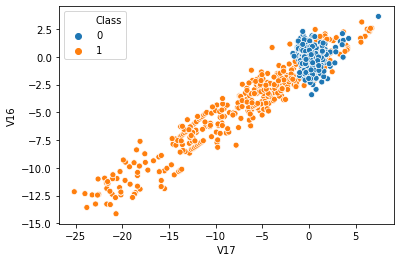

In [167]:
sns.scatterplot(data=bank_data_undersampled,x='V17',y='V16',hue='Class')

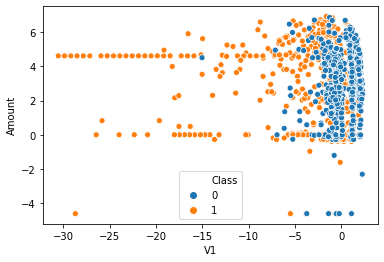

In [168]:
sns.scatterplot(data=bank_data_undersampled,x='V1',y='Amount',hue='Class')

In [169]:
bank_data_undersampled['Amount'] = StandardScaler().fit_transform(bank_data_undersampled['Amount'].values.reshape(-1, 1))
bank_data_undersampled['Time_hour'] = StandardScaler().fit_transform(bank_data_undersampled['Time_hour'].values.reshape(-1, 1))

In [170]:
bank_data_undersampled=bank_data_undersampled.drop(["Time",'date_tie','year','month','day','time','hour'],axis=1)

In [171]:
bank_data_undersampled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_hour,Time_day
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.581210,1,-1.960801,0
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1.228766,1,-1.806379,0
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.603437,1,-1.806379,0
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-1.214205,1,-1.651956,0
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,-1.214205,1,-1.651956,0


In [172]:
labels = bank_data_undersampled.Class
features = bank_data_undersampled.drop('Class', axis=1)

In [173]:

model_arr=[]
accuracy_arr=[]
std_arr=[]
def clf_result(classifier,classifier_name):
    acc_scores = cross_val_score(classifier, features, labels, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True, random_state=142),n_jobs=-1)
    accuracy=acc_scores.mean()
    std=acc_scores.std()
    print("Classifier_name :",classifier_name)
    print("Average accuracy: ",accuracy)
    print("standard dev: ",std)
    model_arr.append(classifier_name)
    accuracy_arr.append(accuracy)
    std_arr.append(std)
    return acc_scores

In [202]:
lgr = LogisticRegression(random_state=142)
lgr_acc=clf_result(lgr,"LogisticRegression")

Classifier_name : LogisticRegression
Average accuracy:  0.9444063143445437
standard dev:  0.020251671064977664


In [199]:
lgr_acc

array([0.92553191, 0.95744681, 0.96808511, 0.9787234 , 0.92553191,
       0.94680851, 0.92473118, 0.91397849, 0.95698925, 0.94623656])

In [200]:
lgr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=142, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
rf=RandomForestClassifier(max_depth=1,n_estimators=250,random_state=142)
rf_acc=clf_result(rf,"Random FOrrest")

Classifier_name : Random FOrrest
Average accuracy:  0.9476206817661863
standard dev:  0.021642297055998683


In [178]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=142,
                       verbose=0, warm_start=False)

In [179]:
rf_acc

array([0.92553191, 0.96808511, 0.96808511, 0.9787234 , 0.91489362,
       0.95744681, 0.93548387, 0.92473118, 0.96774194, 0.93548387])

In [180]:
mlp = MLPClassifier(hidden_layer_sizes=(128),alpha=0.0001,random_state=142)
mlp_acc=clf_result(mlp," MLPClassifier")

Classifier_name :  MLPClassifier
Average accuracy:  0.9529398307023564
standard dev:  0.01812789966026783


In [181]:
mlp_acc

array([0.92553191, 0.96808511, 0.96808511, 0.96808511, 0.95744681,
       0.9787234 , 0.94623656, 0.92473118, 0.95698925, 0.93548387])

In [182]:
sv_c=svm.SVC(random_state=142)
sv_c_acc=clf_result(sv_c," SVM")

Classifier_name :  SVM
Average accuracy:  0.9358384808968199
standard dev:  0.020422654145253766


As MLP CLassifier gives the hiest accuracy we can use that as our model 

In [183]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=142, test_size=0.20)

In [184]:
import time
def get_prediction_time(model,X_train, X_test, y_train, y_test):
    start_time_train = time.time()
    model.fit(X_train,y_train)
    end_time_train=time.time()-start_time_train
    start_time_test = time.time()
    model.predict(X_test)
    test_time = time.time()-start_time_test
    context={'end_time_train':end_time_train,"test_time":test_time}
    return context

precision: [0.52659574 1.         1.        ]
recall: [1.         0.84848485 0.        ]
0.9641360412637009


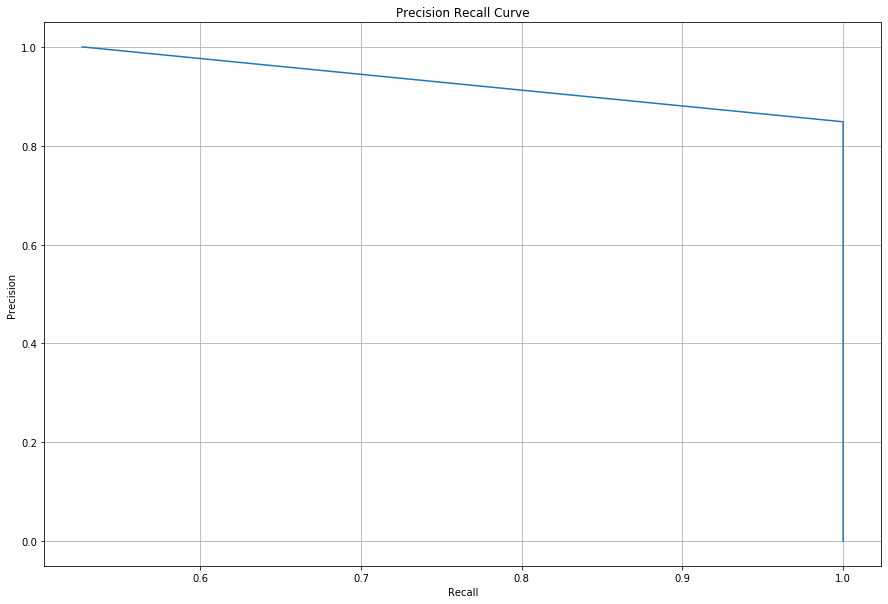

In [210]:

from sklearn import metrics
mlp = RandomForestClassifier(max_depth=1,n_estimators=250,random_state=142)
mlp.fit(X_train,y_train)
y_pred_prob=mlp.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(15,10))
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.grid()
print("precision:",precision)
print("recall:",recall)
area = metrics.auc(recall, precision)
print(area)
plt.show()

precision: [0.52659574 0.96808511 1.        ]
recall: [1.         0.91919192 0.        ]
0.9649151085321298


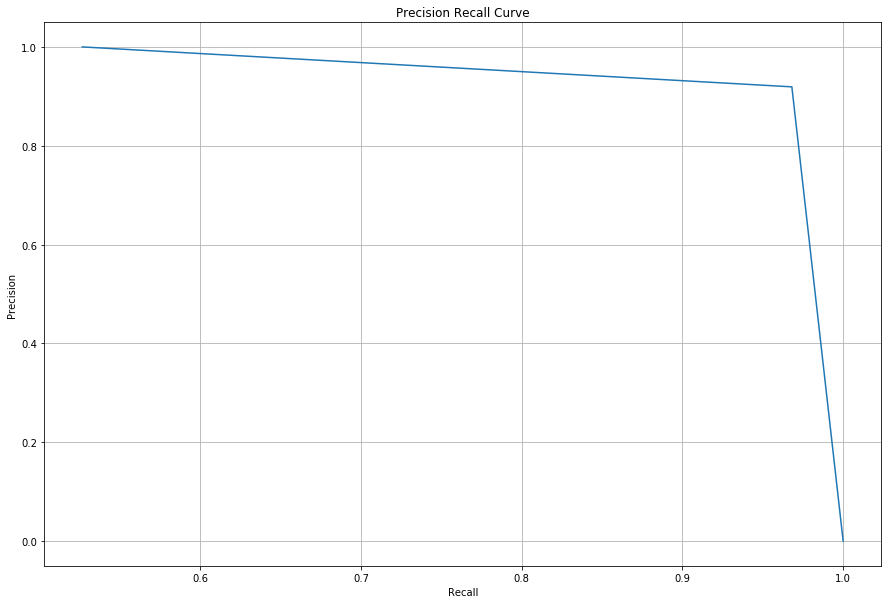

In [211]:
mlp = LogisticRegression(random_state=142)
mlp.fit(X_train,y_train)
y_pred_prob=mlp.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(15,10))
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.grid()
print("precision:",precision)
print("recall:",recall)
area = metrics.auc(recall, precision)
print(area)
plt.show()

precision: [0.52659574 0.96842105 1.        ]
recall: [1.         0.92929293 0.        ]
0.9674740122388499


C:\Users\Tawhid\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


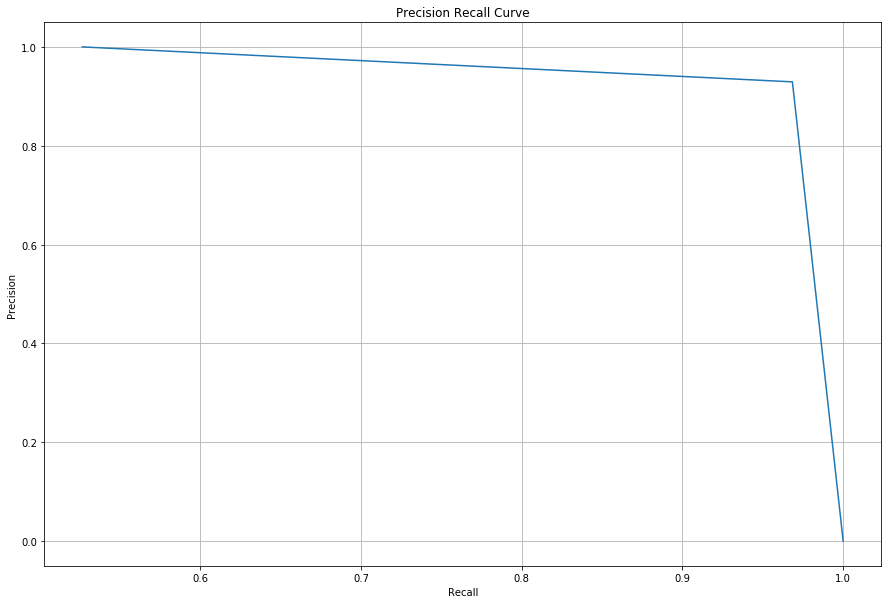

In [212]:
mlp = MLPClassifier(hidden_layer_sizes=(128),alpha=0.0001,random_state=142)
mlp.fit(X_train,y_train)
y_pred_prob=mlp.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(15,10))
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.grid()
print("precision:",precision)
print("recall:",recall)
area = metrics.auc(recall, precision)
print(area)
plt.show()

In [189]:
precision

array([0.52659574, 0.96842105, 1.        ])

In [190]:
recall

array([1.        , 0.92929293, 0.        ])

In [191]:
accuracy=accuracy_score(y_test,y_pred_prob)
accuracy

0.9468085106382979

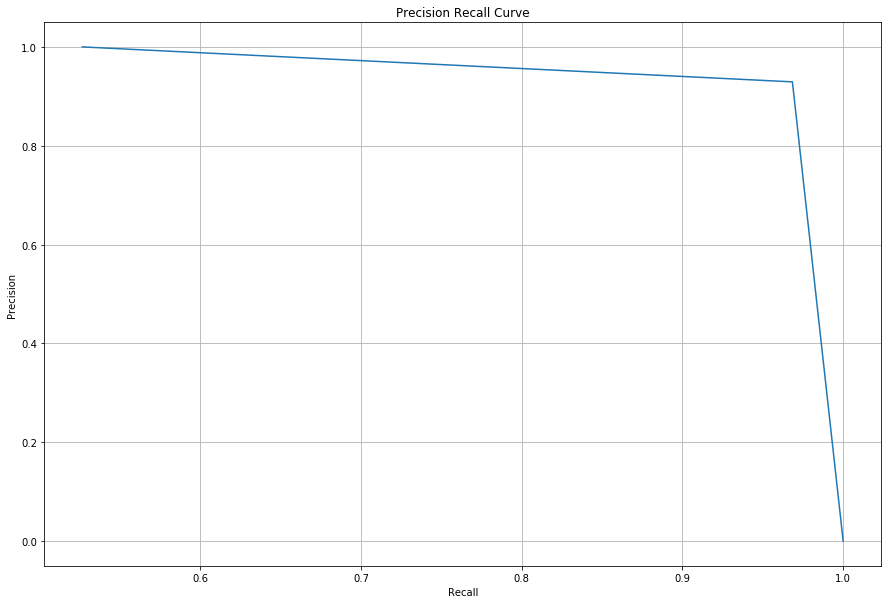

Time for the Algorithms

In [193]:
get_prediction_time(sv_c,X_train, X_test, y_train, y_test)

{'end_time_train': 0.009992361068725586, 'test_time': 0.0030417442321777344}

In [194]:
get_prediction_time(mlp,X_train, X_test, y_train, y_test)

C:\Users\Tawhid\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'end_time_train': 1.8916380405426025, 'test_time': 0.0020329952239990234}

In [195]:
get_prediction_time(rf,X_train, X_test, y_train, y_test)

{'end_time_train': 0.5889978408813477, 'test_time': 0.023058652877807617}

In [196]:
get_prediction_time(lgr,X_train, X_test, y_train, y_test)

{'end_time_train': 0.031958818435668945, 'test_time': 0.0010058879852294922}

In [197]:
num_ensemblers=100
ground_truth = y
classifiers = [("sklearn.ISO", IsolationForest(num_ensemblers)), ("ALSH", LSHiForest('ALSH', num_ensemblers)), ("L1SH", LSHiForest('L1SH', num_ensemblers)), ("L2SH", LSHiForest('L2SH', num_ensemblers))]

NameError: name 'y' is not defined

In [ ]:
## Keras

In [243]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
input_dim = X_train.shape[1]  # Number of features
modeldropout1 = Sequential()
modeldropout1.add(layers.Dense(1000, input_dim=input_dim, activation='relu'))
modeldropout1.add(layers.Dense(500,activation='relu'))
modeldropout1.add(layers.Dropout(0.7))
modeldropout1.add(layers.Dense(700,activation='relu'))
modeldropout1.add(layers.Dense(800,activation='relu'))
modeldropout1.add(layers.Dropout(0.8))
modeldropout1.add(layers.Dense(2, activation='softmax'))

In [244]:
modeldropout1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1000)              32000     
_________________________________________________________________
dense_16 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 700)               350700    
_________________________________________________________________
dense_18 (Dense)             (None, 800)               560800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 2)                

In [245]:
modeldropout1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modeldropout1.fit(X_train, y_train,epochs=5, batch_size=10, verbose=1)

Train on 748 samples
Epoch 1/5
748/748 [==============================] - 1s 2ms/sample - loss: 0.4140 - accuracy: 0.8422
Epoch 2/5
748/748 [==============================] - 1s 1ms/sample - loss: 0.2612 - accuracy: 0.9238
Epoch 3/5
748/748 [==============================] - 1s 2ms/sample - loss: 0.1861 - accuracy: 0.9372
Epoch 4/5
748/748 [==============================] - 1s 2ms/sample - loss: 0.1718 - accuracy: 0.9519
Epoch 5/5
748/748 [==============================] - 1s 2ms/sample - loss: 0.1197 - accuracy: 0.9693


In [232]:
g=modeldropout1.predict_classes(X_test)

In [233]:
g

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

precision: [0.52659574 0.96842105 1.        ]
recall: [1.         0.92929293 0.        ]
0.9674740122388499


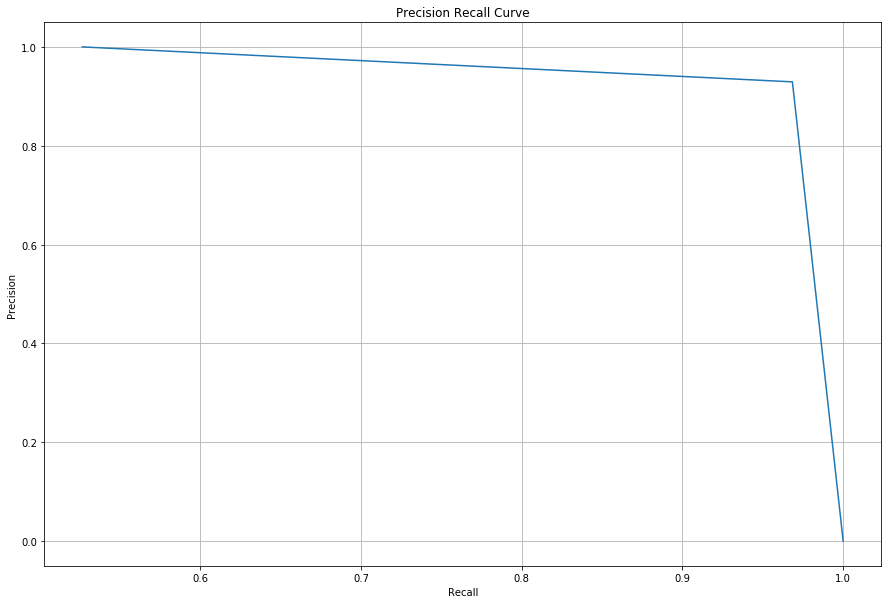

In [234]:
precision, recall, thresholds = precision_recall_curve(y_test, g)
plt.figure(figsize=(15,10))
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.grid()
print("precision:",precision)
print("recall:",recall)
area = metrics.auc(recall, precision)
print(area)
plt.show()

In [239]:
start_time_train = time.time()
g=modeldropout1.predict_classes(X_test)
end_time_train=time.time()-start_time_train
print(end_time_train)

0.04196357727050781


In [221]:
# Is our model still predicting just one class?
print( np.unique(g) )
# [0 1]
from sklearn.metrics import classification_report
# How's our accuracy?
print(accuracy_score(y_test, g)) 
target_names = ['Class 0','Class 1']
print(classification_report(y_test, g , target_names=target_names))

[0 1]
0.46808510638297873
              precision    recall  f1-score   support

     Class 0       0.47      0.99      0.64        89
     Class 1       0.00      0.00      0.00        99

    accuracy                           0.47       188
   macro avg       0.24      0.49      0.32       188
weighted avg       0.22      0.47      0.30       188



In [222]:
# from keras.models import Sequential
# from keras import layers
# input_dim = X_train.shape[1]  # Number of features
# modeldropout1 = Sequential()
# modeldropout1.add(layers.Dense(1000, input_dim=input_dim, activation='relu'))
# modeldropout1.add(layers.Dense(500,activation='relu'))
# modeldropout1.add(layers.Dropout(0.7))
# modeldropout1.add(layers.Dense(700,activation='relu'))
# modeldropout1.add(layers.Dense(800,activation='relu'))
# modeldropout1.add(layers.Dropout(0.8))
# modeldropout1.add(layers.Dense(4, activation='softmax'))

# modeldropout1.compile(loss='sparse_categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
                   
# modeldropout1.fit(X_train, y_train,epochs=5, batch_size=10, verbose=0)

# g=modeldropout1.predict_classes(X_test)

# # Is our model still predicting just one class?
# print( np.unique(g) )
# # [0 1]
 
# # How's our accuracy?
# print(accuracy_score(y_test, g)) 
# target_names = ['Class 0','Class 1']
# print(classification_report(y_test, g , target_names=target_names))

In [ ]:
Models=['Random Forest Classifier','Deep Neural Network','LogisticRegression']
Model_accuracy=[94.76206817661863,95.21276595744681,94.44063143445437]
Model_predict_time=[0.024996519088745117,0.0520014762878418,0.0010023117065429688]

In [ ]:
sns.barplot(x=Models,y=Model_accuracy)

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
s,p=ttest_ind(lgr_acc,mlp_acc)
print("p:",p)

In [ ]:
s,p=ttest_ind(rf_acc,mlp_acc)
print("p:",p)

In [ ]:
s,p=ttest_ind(lgr_acc,rf_acc)
print("p:",p)